In [106]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers.experimental import RMSprop
from keras.layers import Dropout, Flatten, Dense 

In [79]:
# train =  ImageDataGenerator(rescale= 1/252)
# validation =  ImageDataGenerator(rescale= 1/252)

In [122]:
img_height,img_width=180,180
batch_size=23
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
 r"C:\Users\Admin\Desktop\Projects\Fruit Disease Detection\Apple Dataset\apple_disease_classification\Train",
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 382 files belonging to 4 classes.


In [123]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  r"C:\Users\Admin\Desktop\Projects\Fruit Disease Detection\Apple Dataset\apple_disease_classification\Test",
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 120 files belonging to 4 classes.


In [124]:
class_names = train_ds.class_names
class_names

AttributeError: 'MapDataset' object has no attribute 'class_names'

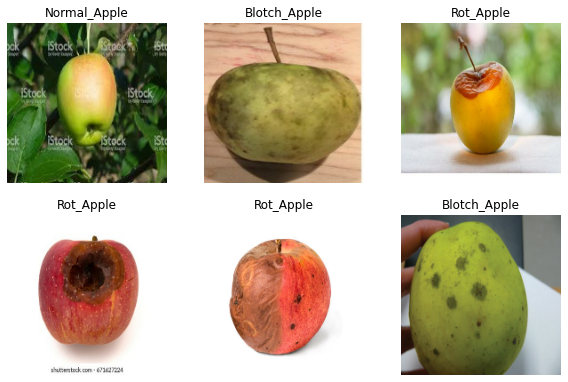

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [111]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(4, activation='softmax'))

In [112]:
resnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               1049088   
                                                                 
 dense_13 (Dense)            (None, 4)                 2052      
                                                                 
Total params: 24,638,852
Trainable params: 1,051,140
Non-trainable params: 23,587,712
_________________________________________________________________


In [113]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss="sparse_categorical_crossentropy",metrics=['accuracy'])


In [114]:
epochs=11
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/11
17/17 [==============================] - 81s 4s/step - loss: 1.4718 - accuracy: 0.6021 - val_loss: 0.9256 - val_accuracy: 0.6583
Epoch 2/11
17/17 [==============================] - 70s 4s/step - loss: 0.3177 - accuracy: 0.9058 - val_loss: 0.7454 - val_accuracy: 0.7417
Epoch 3/11
17/17 [==============================] - 60s 3s/step - loss: 0.1481 - accuracy: 0.9450 - val_loss: 0.7002 - val_accuracy: 0.7583
Epoch 4/11
17/17 [==============================] - 61s 4s/step - loss: 0.0925 - accuracy: 0.9686 - val_loss: 0.7469 - val_accuracy: 0.7667
Epoch 5/11
17/17 [==============================] - 60s 4s/step - loss: 0.0351 - accuracy: 0.9921 - val_loss: 0.7793 - val_accuracy: 0.7750
Epoch 6/11
 7/17 [===========>..................] - ETA: 31s - loss: 0.0234 - accuracy: 1.0000

KeyboardInterrupt: 

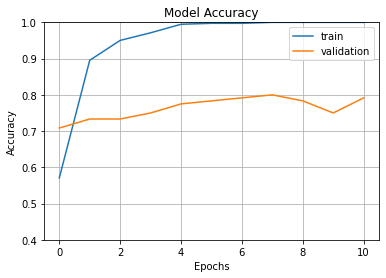

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

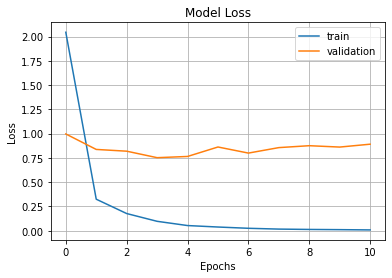

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  r"C:\Users\Admin\Desktop\Projects\Fruit Disease Detection\Apple Dataset\apple_disease_classification\Test",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 120 files belonging to 4 classes.


In [ ]:
test_loss, test_accuracy = resnet_model.evaluate(test_ds, verbose=1)
print("Loss  : ", test_loss)
print("Accuracy  :",test_accuracy)

6/6 [==============================] - 14s 2s/step - loss: 0.8914 - accuracy: 0.7917
Loss  :  0.8914336562156677
Accuracy  : 0.7916666865348816


In [92]:
test_loss, test_accuracy = resnet_model.evaluate(test_ds, verbose=1)
print("Loss  : ", test_loss)
print("Accuracy  :",test_accuracy)

6/6 [==============================] - 13s 2s/step - loss: 0.8914 - accuracy: 0.7917
Loss  :  0.891433596611023
Accuracy  : 0.7916666865348816


In [105]:
test_image = image.load_img(r'C:\Users\Admin\Desktop\Projects\Fruit Disease Detection\Apple Dataset\apple_disease_classification\Test\Rot_Apple\2apbkfh.jpg', target_size = (180,180))
test_image = np.expand_dims(test_image, axis=0)
result = resnet_model.predict(test_image)
output_class=class_names[np.argmax(result)]
output_class
np.argmax(result)

1/1 [==============================] - 0s 228ms/step


2

In [17]:
resnet_model.save(r'C:\Users\Admin\Desktop\Projects\Fruit Disease Detection/ResNet50Trained/resnet50withoutaug')

INFO:tensorflow:Assets written to: C:\Users\Admin\Desktop\Projects\Fruit Disease Detection/ResNet50Trained/resnet50withoutaug\assets


INFO:tensorflow:Assets written to: C:\Users\Admin\Desktop\Projects\Fruit Disease Detection/ResNet50Trained/resnet50withoutaug\assets


In [93]:
from tensorflow import keras
model = keras.models.load_model(r'C:\Users\Admin\Desktop\Projects\Fruit Disease Detection/ResNet50Trained/resnet50withoutaug')

In [94]:
test_loss, test_accuracy = model.evaluate(test_ds, verbose=1)
print("Loss  : ", test_loss)
print("Accuracy  :",test_accuracy)

6/6 [==============================] - 17s 2s/step - loss: 0.8696 - accuracy: 0.8083
Loss  :  0.8695570826530457
Accuracy  : 0.8083333373069763


In [19]:
test_image = image.load_img(r'C:\Users\Admin\Desktop\Projects\Fruit Disease Detection\Apple Dataset\apple_disease_classification\Test\Rot_Apple\2apbkfh.jpg', target_size = (180,180))
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
output_class=class_names[np.argmax(result)]
output_class

1/1 [==============================] - 2s 2s/step


'Rot_Apple'

In [95]:
model.save(r'C:\Users\Admin\Desktop\Projects\Fruit Disease Detection/ResNet50Trained/resnet50.h5')

In [96]:
from tensorflow import keras
model = keras.models.load_model(r'C:\Users\Admin\Desktop\Projects\Fruit Disease Detection/ResNet50Trained/resnet50.h5')

In [97]:
test_loss, test_accuracy = model.evaluate(test_ds, verbose=1)
print("Loss  : ", test_loss)
print("Accuracy  :",test_accuracy)

6/6 [==============================] - 20s 2s/step - loss: 0.8696 - accuracy: 0.8083
Loss  :  0.8695571422576904
Accuracy  : 0.8083333373069763


In [136]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the trained model
resnet_model = tf.keras.models.load_model(r'C:\Users\Admin\Desktop\Projects\Fruit Disease Detection/ResNet50Trained/resnet50.h5')

# Define the image path
image_path = r'C:\Users\Admin\Desktop\Projects\Fruit Disease Detection\Apple Dataset\apple_disease_classification\Test\Rot_Apple\2apbkfh.jpg'


# Load and preprocess the single image
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(180, 180))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img, axis=0)
preprocessed_img = tf.keras.applications.resnet.preprocess_input(img_array)

class_names=['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']

# Perform prediction
predictions = resnet_model.predict(preprocessed_img)
predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]


# Map predicted class label to treatment and pesticide
class_to_treatment = {
    0: 'Blotch_Apple: Apply a suitable fungicide spray containing captan or mancozeb. Prune infected branches and destroy fallen leaves.',
    1: 'Normal_Apple: No specific treatment needed. Maintain good cultural practices, such as proper watering and fertilization.',
    2: 'Rot_Apple: Discard infected apples. Maintain proper storage conditions with good ventilation and controlled humidity.',
    3: 'Scab_Apple: Apply a suitable fungicide spray containing myclobutanil or sulfur. Prune and destroy infected plant parts.'
}

class_to_pesticide = {
    0: 'Blotch_Apple: Use fungicides containing captan or mancozeb at recommended doses.',
    1: 'Normal_Apple: No specific pesticide needed.',
    2: 'Rot_Apple: Maintain proper storage conditions, including temperature and humidity control. No specific pesticide recommended.',
    3: 'Scab_Apple: Use fungicides containing myclobutanil or sulfur as per label instructions.'
}

# Print the prediction and associated treatment and pesticide
print("Predicted Class:", predicted_class)
print("\nTreatment Recommendation:")
print(class_to_treatment[predicted_class_index])
print("\nPesticide Recommendation:")
print(class_to_pesticide[predicted_class_index])


1/1 [==============================] - 3s 3s/step
Predicted Class: Rot_Apple

Treatment Recommendation:
Rot_Apple: Discard infected apples. Maintain proper storage conditions with good ventilation and controlled humidity.

Pesticide Recommendation:
Rot_Apple: Maintain proper storage conditions, including temperature and humidity control. No specific pesticide recommended.


In [137]:
print("Predicted Class: {}\nTreatment Recommendation: {}\nPesticide Recommendation: {}".format(predicted_class, class_to_treatment[predicted_class_index], class_to_pesticide[predicted_class_index]))


Predicted Class: Rot_Apple
Treatment Recommendation: Rot_Apple: Discard infected apples. Maintain proper storage conditions with good ventilation and controlled humidity.
Pesticide Recommendation: Rot_Apple: Maintain proper storage conditions, including temperature and humidity control. No specific pesticide recommended.


In [129]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Set the paths to your train and test directories
train_dir = r"C:\Users\Admin\Desktop\Projects\Fruit Disease Detection\Apple Dataset\apple_disease_classification\Train"
test_dir = r"C:\Users\Admin\Desktop\Projects\Fruit Disease Detection\Apple Dataset\apple_disease_classification\Test"

# Set the image size and batch size
image_size = (224, 224)
batch_size = 15
epochs = 30

# Create data generators for train and test sets
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a Sequential model
model = Sequential()

# Add the ResNet50 base model to the Sequential model
model.add(base_model)

# Add a global spatial average pooling layer
model.add(GlobalAveragePooling2D())

# Add a fully-connected layer
model.add(Dense(512, activation='relu'))

# Add an output layer with one node per class
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


Found 382 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


Epoch 1/30
26/26 [==============================] - 99s 3s/step - loss: 1.4921 - accuracy: 0.2382 - val_loss: 1.3678 - val_accuracy: 0.4500
Epoch 2/30
26/26 [==============================] - 87s 3s/step - loss: 1.3128 - accuracy: 0.3770 - val_loss: 1.4814 - val_accuracy: 0.2667
Epoch 3/30
26/26 [==============================] - 87s 3s/step - loss: 1.2691 - accuracy: 0.4136 - val_loss: 1.2907 - val_accuracy: 0.4083
Epoch 4/30
26/26 [==============================] - 94s 4s/step - loss: 1.3361 - accuracy: 0.3691 - val_loss: 1.4449 - val_accuracy: 0.5500
Epoch 5/30
26/26 [==============================] - 95s 4s/step - loss: 1.3615 - accuracy: 0.3770 - val_loss: 1.2661 - val_accuracy: 0.5917
Epoch 6/30
26/26 [==============================] - 84s 3s/step - loss: 1.1604 - accuracy: 0.5550 - val_loss: 1.2543 - val_accuracy: 0.4667
Epoch 7/30
26/26 [==============================] - 77s 3s/step - loss: 1.1527 - accuracy: 0.5419 - val_loss: 1.6173 - val_accuracy: 0.3083
Epoch 8/30
26/26 [==

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
